<br>
<br>
<center>
    
# 人工智能高阶人才培训班

<br>

> ## 第三课：深度学习基础设施与工具(2)
</center>
<br>

# 线性回归与随机梯度下降演示代码

> 本部分代码用于演示随机梯度下降的基本过程

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 从线性回归问题谈起

In [2]:
#1000 data points 
NUM_EXAMPLES = 300

In [3]:
#define inputs and outputs with some noise 
X = tf.random.normal([NUM_EXAMPLES])  #inputs 
noise = tf.random.normal([NUM_EXAMPLES]) #noise 
W_,b_ = 3,2
y = X * W_ + b_ + noise  #true output

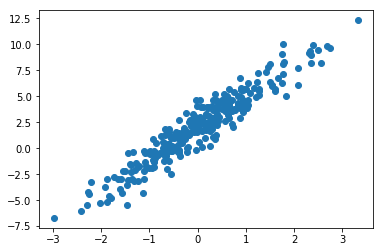

In [4]:
plt.scatter(X,y)

### 定义损失函数

In [5]:
# Mean square error.
def mse(y_hat, y):
    #calcuate the loss (difference squared error)
    error = y_hat - y
    loss = tf.reduce_mean(tf.square(error))
    return loss

假设我们瞎蒙了一组参数w0=1,b0=-5,我们通过计算一个估计值`y_hat`，然后通过计算损失函数来评估我们的猜测

In [6]:
W0=1 
b0=-5
y_hat0 = W0 * X + b0
mse(y_hat0, y)

<tf.Tensor: id=48, shape=(), dtype=float32, numpy=54.952324>

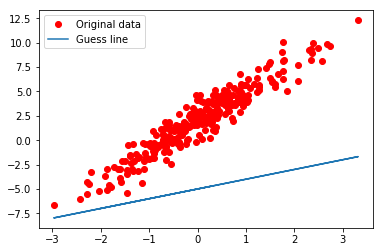

In [7]:
# Graphic display
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, y_hat0, label='Guess line')
plt.legend()
plt.show()

### 梯度下降
> 优化算法的目标是寻找一组合适的参数`w,b` 使得`mse`损失最小；

> 梯度下降就是这么一种算法

In [8]:
def update():
  #watch the gradient flow 
  with tf.GradientTape() as tape:
    
    #forward pass 
    yhat = X * W + b
    
    #calcuate the loss (difference squared error)
    error = yhat - y
    loss = tf.reduce_mean(tf.square(error))
  
  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the paramters using Gradient Descent  
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)
  return loss,W,b
    

#### 定义相关超参数

In [9]:
#training info
train_steps = 200
learning_rate = 0.01
W = tf.Variable(0.)
b = tf.Variable(0.)

In [10]:
for i in range(train_steps):
  
  loss,W,b = update()
  #print the loss every 20 iterations 
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss))
print("W: %3f, b: %3f" %(W.numpy(), b.numpy()))      

Loss at step 000: 14.821
Loss at step 020: 7.012
Loss at step 040: 3.630
Loss at step 060: 2.165
Loss at step 080: 1.531
Loss at step 100: 1.255
Loss at step 120: 1.136
Loss at step 140: 1.085
Loss at step 160: 1.062
Loss at step 180: 1.052
W: 2.988727, b: 1.994082


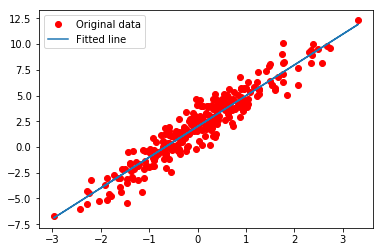

In [11]:
# Graphic display
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

### 动画演示

In [12]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [13]:
#create model paramters with initial values 
W = tf.Variable(0.)
b = tf.Variable(0.)

fig = plt.figure()
plt.scatter(X, y, c='orange')
line, = plt.plot(X, np.array(W * X + b))
plt.close()

def animate(i):
    update()
    line.set_ydata(np.array(W * X + b))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

### 练习
1. 尝试修改下学习率，看看变化情况；
2. 尝试修改w，b的初始值，看下收敛速度；
3. 迭代次数多少有差别么？

## 不同学习率下，SGD的表现

<video src="./img/lr001.mp4" controls="controls"> </video> 

<video src="./img/lr0.1.mp4" controls="controls"> </video> 

<video src="./img/lr0.7.mp4" controls="controls"> </video> 

<video src="./img/lr0.99.mp4" controls="controls"> </video> 

<video src="./img/lr1.01.mp4" controls="controls"> </video> 